## Feature Engineering for NLP in Python

**Course Structure:**
* Chapter 1. Basic features and readability scores
* Chapter 2. Text preprocessing, POS tagging and NER
* Chapter 3. N-Gram models
* Chapter 4. TF-IDF and similarity scores

### CHAPTER 1. Basic features and readability scores

#### Part 1.1 Introduction to NLP feature engineering

* For any ML algorithm, data fed into it must be in **tabular form** and the features must be **numerical**
* Categorical data can be converted into numerical through **one-hot encoding**
* Use *'pd.get_dummies()'* method to achieve it
* Text data needs to be preprocessed with two steps
    1. Standardize the text (e.g: lowercase, base form)
    2. Vectorize the text (e.g: bag-of-words, tf-idf)
* Basic features about text data:
    * Number of words
    * Number of characters
    * Average length of words
* More advanced features about text data:
    * Part-Of-Speech (POS) tagging
    * Named Entity Recognition (NER)

In [2]:
# Code for part 1.1

# one-hot encoding
import pandas as pd

# create dataframe by hand
feature_1 = [29.0, 0.9167, 2.0, 30.0, 25.0, 48.0, 63.0, 39.0, 53.0, 71.0, 47.0, 18.0, 24.0, 26.0, 80.0]
feature_2 = [0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0]
feature_3 = [0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
feature_4 = [211.3375, 151.55, 151.55, 151.55, 151.55, 26.55, 77.9583, 0.0, 51.4792, 49.5042, 227.525, 227.525, 69.3, 78.85, 30.0]
feature_5 = ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male']
label = [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

df1 = pd.DataFrame({'feature_1': feature_1, 'feature_2':feature_2, 'feature_3':feature_3, 'feature_4':feature_4, 'feature_5':feature_5, 'label':label})
print(df1.columns)

# perform one-hot encoding for column 'feature_5'
df1 = pd.get_dummies(df1, columns=['feature_5'])
print(df1.columns)
print(df1.head())

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'label'],
      dtype='object')
Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label',
       'feature_5_female', 'feature_5_male'],
      dtype='object')
   feature_1  feature_2  feature_3  feature_4  label  feature_5_female  \
0    29.0000          0          0   211.3375      1                 1   
1     0.9167          1          2   151.5500      1                 0   
2     2.0000          1          2   151.5500      0                 1   
3    30.0000          1          2   151.5500      0                 0   
4    25.0000          1          2   151.5500      0                 1   

   feature_5_male  
0               0  
1               1  
2               0  
3               1  
4               0  


#### Part 1.2 Basic feature extraction

**Basic feature extraction:**
* Number of characters with *'len()'* method
* Number of words with *'.split()'* and *'len()'* method
* Average word length with *'.split()'*, *'len()'*, and *'mean()'* method
* You can crate functions to apply these easier
* For special data like tweets, some special features like *hashtags* and *mentions* are worth checking on
* Use *''.startswith()* method to achieve it
* Other features :
    * Number of sentences
    * Number of paragraphs
    * Words starting with an uppercase
    * All-capital words
    * Numerical quantities

In [8]:
# Code for part 1.2

# character count of Russian tweets
import pandas as pd

# get tweets data
tweets = pd.read_csv('13_datasets/russian_tweets.csv')
# print(tweets.head())
print(tweets.columns)

# create a feature 'char_count'
tweets['char_count'] = tweets['content'].apply(len)
print("Average word length in tweets:")
print(tweets['char_count'].mean())

Index(['Unnamed: 0', 'content'], dtype='object')
Average word length in tweets:
103.462


In [9]:
# Code for part 1.2 (continue)

# word count for TED talks
import pandas as pd

# get TED talks data
ted = pd.read_csv('13_datasets/ted.csv')
# print(ted.head())
print(ted.columns)

# create a function to count number of words in string
def count_words(string):
    words = string.split()
    return len(words)

# create a new feature 'word_count'
ted['word_count'] = ted['transcript'].apply(count_words)
print('Average words in each TED talk:')
print(ted['word_count'].mean())

Index(['transcript', 'url'], dtype='object')
Average words in each TED talk:
1987.1


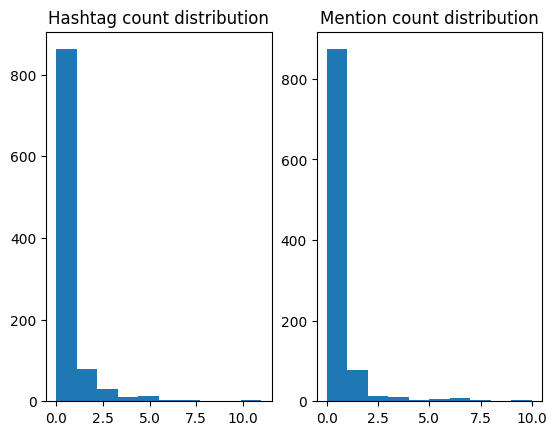

In [11]:
# Code for part 1.2 (continue)

# hashtags and mentions in Russian tweets
import pandas as pd
import matplotlib.pyplot as plt

# get tweets data
tweets = pd.read_csv('13_datasets/russian_tweets.csv')

# create functions to return number of hashtags and mentions in a string
def count_hashtags(string):
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

def count_mentions(string):
    words = string.split()
    mentions = [word for word in words if word.startswith('@')]
    return len(mentions)

# create new features 'hashtag_count' and 'mention_count'
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['mention_count'] = tweets['content'].apply(count_mentions)

# create data visualizations
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(tweets['hashtag_count'])
ax2.hist(tweets['mention_count'])
ax1.set_title('Hashtag count distribution')
ax2.set_title('Mention count distribution')
plt.show()


#### Part 1.3 Readability tests

* It is used to determine the *readability* of a particular passage
* Scale ranging from *Primary School* to *College Graduate* level
* A mathematical formula with word, syllable and sentence count
* It is used in *fake news* and *opinion spam* detection
* Examples: (we go into details with first two scores)
    * **Flesch reading ease**
    * **Gunning fog index**
    * Simple Measure of Gobbledygook (SMOG)
    * Dale-Chall score
* **Textatistic** library can be used to do these tests

**Flesch reading ease:**
* One of the oldest and most widely used tests
* Dependent on two factors:
1. Average sentence length
2. Average number of syllables
* Higher the score, greater the readability (easier to understand)

**Gunning fog index:**
* Developed in 1954
* Dependent on two factors:
1. Average sentence length
2. Percentage of complex words
* Higher the score, lesser the readability (more difficult to understand)


In [14]:
# Code for part 1.4

# readability of 'The Myth of Sisyphus'
from textatistic import Textatistic

# get text file
text_file = open('13_datasets/sisyphus.txt', 'rb')
sisyphus = text_file.read()
text_file.close()
sisyphus = sisyphus.decode('utf-8')

# compute the readability scores
readability_scores = Textatistic(sisyphus).scores
flesch = readability_scores['flesch_score']

# print the scores
print('The flesch reading ease is %.2f' % (flesch))


The flesch reading ease is 81.67


In [1]:
# Code for part 1.4 (continue)

# readability vs. publications
from textatistic import Textatistic

# get strings
forbes = 'The idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.'

harvard_law = 'In his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship.'
r_digest = 'This week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.'
time_kids = 'That, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.'

# list of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# loop through
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_score = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_score)

print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


### CHAPTER 2. Text preprocessing, POS tagging and NER

#### Part 2.1 Tokenization and Lemmatization

* We need to **standardize** texts into a *machine friendly format* when text might have different sources
* Example: *reduction*, *reducing*, *reduce* mean similar things
* Text preprocessing techniques:
    * Converting words into lowercase
    * Removing leading and trailing whitespace
    * Removing punctuation
    * Removing stopwords
    * Expanding contractions
    * Removing special characters (numbers, emojis, etc.)
* **Tokenization** is the process of splitting a string into tokens, tokens can be sentences, words or punctuations
* Use *'Spacy'* library for tokenization

* **Lemmatization** is the process of converting a word into its lowercased based form or lemma
* Example: reducing, reduces, reduced, reduction -> reduce
* Example: am, is, are -> be
* Use *'Spacy'* library for lemmatization, too

In [2]:
# Code for part 2.1

# tokenizing the Gettysburg address
import spacy

# get the speech text
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

# load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# create a doc object
doc = nlp(gettysburg)

# generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "n't", 'dedicate', '-', 'we', '

In [3]:
# Code for part 2.1 (continue)

# lammatizing the Gettysburg address
# use the same text file 'gettysburg'
import spacy

# load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# create a doc object
doc = nlp(gettysburg)

# generate the lemmas
lemmas = [token.lemma_ for token in doc]
print(' '.join(lemmas))

# note how different the text is with lemmatization

four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we can not dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

#### Part 2.2 Text cleaning

**Non-alphabet:**
* *'.isalpha()'* method to return TRUE if all the characters are alphabets
* It is a convenient method to remove all (lemmatized) tokens that are or contain numbers, punctuation or emojis
* Sometimes, it would return FALSE on some words that we would not want to remove, like abbreviations, like U.S.A
* For such situations, you need to write custom functions (with *'regrex'*)

**Stopwords:**
* Stopwords are words that occur extremely commonly
* Examples: *the*, *a*, *is*, *am*, *he*, *she*
* *'SpaCy'* library has a built-in list of stopwords
* Access it with: 'spacy.lang.en.stop_words_STOP_WORDS'
* Be careful when you use third party stop words
* It is always advisable to create *your own stop words list*



In [1]:
# Code for part 2.2

# cleaning a blog post
import spacy


# get blog content
blog = 'Twenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.'

# load model and create doc object, stopwords
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)
stopwords = nlp.Defaults.stop_words

# create lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
print(' '.join(a_lemmas))



OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

#### Part 2.3 Part-of-speech tagging

*

#### Part 2.4 Named entity recognition (NER)

*

### CHAPTER 3. N-Gram models

#### Part 3.1 Building a bag of words model

*

#### Part 3.2 Building a BoW Naive Bayes classifier

*

#### Part 3.3 Building n-gram models

*

### CHAPTER 4. TF-IDF and similarity scores

#### Part 4.1 Building tf-idf document vectors

*

#### Part 4.2 Cosine similarity

*

#### Part 4.3 Building a plot line based recommender

*

#### Part 4.4 Beyond n-grams: word embeddings

*